In [43]:
import sys
import os

# Add the src directory to the Python path
src_path = os.path.join(os.getcwd(), 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

In [44]:
import numpy as np
import pandas as pd
from itertools import product
from sklearn.model_selection import train_test_split
from src.optimizers import *
from src.activation_functions import * 
from src.utils import *
from src.model_regularization import *
from src.layer import *
np.random.seed(0)


#### Data pre-processing for MONK Datasets 

In [45]:
########################################################
### Don't forget to change the path to the data file ###
########################################################

df = pd.read_csv("../ML_project/data/Monk_2/monks-2.train", names=[0,1,2,3,4,5,6,"index"], delimiter= " ")
df = pd.read_csv("../ML_project/data/Monk_2/monks-2.train",
                 names=[0, 1, 2, 3, 4, 5, 6, "index"], delimiter=" ")
df.set_index("index", inplace=True)
y = df.iloc[:, 0]  # First column as target
X = df.iloc[:, 1:]  # All other columns as features
for i in range(1, X.shape[1]):
    X.iloc[:, i] = (X.iloc[:, i] - np.mean(X.iloc[:, i])) / \
        np.std(X.iloc[:, i])
X.head()

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_33476\856293544.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'index
data_4     -1.233337
data_7     -1.233337
data_9     -1.233337
data_10    -1.233337
data_11    -1.233337
              ...   
data_421    1.293135
data_422    1.293135
data_425    1.293135
data_427    1.293135
data_432    1.293135
Name: 2, Length: 169, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.iloc[:, i] = (X.iloc[:, i] - np.mean(X.iloc[:, i])) / \
C:\Users\Mostafa\AppData\Local\Temp\ipykernel_33476\856293544.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'index
data_4     -1.017912
data_7     -1.017912
data_9     -1.017912
data_10    -1.017912
data_11    -1.017912
              ...   
data_421    0.982403
data_422    0.982403
data_425    0.982403
data_427 

,1,2,3,4,5,6
index,,,,,,
data_4,1,-1.233337,-1.017912,-1.264063,-0.432844,0.994100
data_7,1,-1.233337,-1.017912,-1.264063,1.395921,-1.005935
data_9,1,-1.233337,-1.017912,-0.050275,-1.347226,-1.005935
data_10,1,-1.233337,-1.017912,-0.050275,-1.347226,0.994100
data_11,1,-1.233337,-1.017912,-0.050275,-0.432844,-1.005935


In [46]:
########################################################
### Don't forget to change the path to the data file ###
########################################################

test_data = pd.read_csv("../ML_project/data/Monk_2/monks-2.test",
names=[0, 1, 2, 3, 4, 5, 6, "index"], delimiter=" ")
test_data.set_index("index", inplace=True)
# test_data.head()
y_test = test_data.iloc[:, 0]
X_test = test_data.iloc[:, 1:]
for i in range(1, X_test.shape[1]):
    X_test.iloc[:, i] = (X_test.iloc[:, i] - np.mean(X_test.iloc[:, i])) / np.std(X_test.iloc[:, i])

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_33476\3608836368.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'index
data_1     -1.224745
data_2     -1.224745
data_3     -1.224745
data_4     -1.224745
data_5     -1.224745
              ...   
data_428    1.224745
data_429    1.224745
data_430    1.224745
data_431    1.224745
data_432    1.224745
Name: 2, Length: 432, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.iloc[:, i] = (X_test.iloc[:, i] - np.mean(X_test.iloc[:, i])) / np.std(X_test.iloc[:, i])
C:\Users\Mostafa\AppData\Local\Temp\ipykernel_33476\3608836368.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'index
data_1     -1.0
data_2     -1.0
data_3     -1.0
data_4     -1.0
data_5     -1.0
           ... 
data_428    1.0
data_429    1.0
data_430    1.0
data_431    1

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Validation Features Shape:", X_val.shape)
print("Training Target Shape:", y_train.shape)
print("Validation Target Shape:", y_val.shape)

Training Features Shape: (135, 6)
Validation Features Shape: (34, 6)
Training Target Shape: (135,)
Validation Target Shape: (34,)


In [96]:
def create_batches(X, y, batch_size):
    """Create mini-batches from the data"""
    # Convert to numpy array if input is pandas DataFrame/Series
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start_idx in range(0, n_samples, batch_size):
        end_idx = min(start_idx + batch_size, n_samples)
        batch_indices = indices[start_idx:end_idx]
        
        yield X[batch_indices], y[batch_indices] # ****changed something****

In [9]:
import matplotlib.pyplot as plt

def plot_accuracies(train_vals, val_vals, label1="train_accuracies", label2="val_accuracies", title="Accuracy Over Epochs"):
    """
    Plot training and validation accuracies over epochs.

    Parameters:
    - train_accuracies (list or array): Accuracy values for training data over epochs.
    - val_accuracies (list or array): Accuracy values for validation data over epochs.
    - title (str): Title of the plot. Default is "Accuracy Over Epochs".
    """
    plt.figure(figsize=(8, 6))
    plt.plot(train_vals, label=label1, color="blue", linewidth=2)
    plt.plot(val_vals, label=label2, linestyle="--", color="orange", linewidth=2)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

In [14]:
class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons,  l1=0.0, l2=0.0):
        # Normal Xavier initialization
        # scale = np.sqrt(2 / (n_inputs + n_neurons))  # For Leaky ReLU/ReLU activation functions
        # HHe Normal Initialization
        scale = np.sqrt(2/n_inputs) # For Tanh/Sigmoid activation functions
        self.weights = np.random.randn(n_inputs, n_neurons) * scale
        #Random initialization
        # self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        self.l1 = l1
        self.l2 = l2
        
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
   
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues) 
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        
        # L1 regularization
        if self.l1 > 0:
            dl1 = np.ones_like(self.weights)
            dl1[self.weights < 0] = -1
            self.dweights += self.l1 * dl1
            
        # L2 regularization
        if self.l2 > 0:
            self.dweights += 2 * self.l2 * self.weights
            
        # Gradient on values 
        self.dinputs = np.dot(dvalues, self.weights.T)  
               
    def get_regularization_loss(self):
        """
        Calculate regularization loss for the layer.
        
        Returns:
        - regularization_loss: Combined L1 and L2 regularization loss
        """
        regularization_loss = 0
        
        if self.l1 > 0:
            regularization_loss += self.l1 * np.sum(np.abs(self.weights))
            
        if self.l2 > 0:
            regularization_loss += self.l2 * np.sum(self.weights * self.weights)
            
        return regularization_loss
    
class Dropout:
    def __init__(self, rate):
        """
        Initialize a dropout layer.
        
        Parameters:
        - rate: Dropout rate (fraction of inputs to drop)
        """
        self.rate = 1 - rate  # Store keep rate instead of drop rate
        self.mask = None
        
    def forward(self, inputs, training=True):
        """
        Perform the forward pass with dropout.
        
        Parameters:
        - inputs: Input data
        - training: Boolean indicating training mode
        """
        self.inputs = inputs
        
        if training:
            self.mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
            self.output = inputs * self.mask
        else:
            self.output = inputs
            
    def backward(self, dvalues):
        """
        Perform the backward pass through dropout.
        
        Parameters:
        - dvalues: Gradient of the loss with respect to the output
        """
        self.dinputs = dvalues * self.mask
        
        
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        # Since we need to modify the orginial variable,
        # let's make a copy of the values first
        self.dinputs = dvalues.copy()
        
        # zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0

class Activation_Leaky_ReLU:
    def forward(self, inputs, alpha=0.01):
        self.inputs = inputs
        self.output = np.where(inputs > 0, inputs, alpha * inputs)

    def backward(self, dvalues, alpha=0.01):  # f′(x) = {1, α : if  x > 0 ; if x ≤ 0}
        self.dinputs = dvalues.copy()
        self.dinputs = np.where(self.inputs > 0, 1, alpha)
        self.dinputs *= dvalues

class Activation_Sigmoid:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = 1/(1 + np.exp(-inputs))

    def backward(self, dvalues):  # f′(x) = σ(x)⋅(1−σ(x))
        self.dinputs = dvalues.copy()
        self.dinputs = self.output * (1 - self.output)
        self.dinputs *= dvalues


class Activation_Tanh:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.tanh(inputs)

    def backward(self, dvalues):  # f′(x) = 1−tanh**2(x)
        self.dinputs = dvalues.copy()
        self.dinputs = 1 - (self.output)**2
        self.dinputs *= dvalues

class Activation_Softmax:
    def forward(self, inputs):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)
        
        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            single_output = single_output.reshape(-1, 1)
            
            jacobian_matrix = np.diagflat(single_output) - \
                                np.dot(single_output, single_output.T)

            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        if len(y_true.shape) == 1:
            correct_confidence = y_pred_clipped[range(samples), y_true]

        elif len(y_true.shape) == 2:
            correct_confidence = np.sum(y_pred_clipped * y_true, axis=1) 

        negative_log_likelihoods = np.log(correct_confidence)
        return negative_log_likelihoods

    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


class Activation_Softmax_Loss_CategoricalCrossentropy():

    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()


    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)

        # Set the output
        self.output = self.activation.output

        return self.loss.calculate(self.output, y_true)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)

        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        self.dinputs = dvalues.copy()

        self.dinputs[range(samples), y_true] -= 1

        self.dinputs = self.dinputs / samples

class MSE:
    def __init__(self):
        self.dinputs = 0
        self.loss = 0
        self.output = 0
        
        
    def forward(self, y_pred, y_true):
        self.output = np.mean((y_pred - y_true)**2)
        return self.output
    
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        outputs = len(dvalues[0])
        
        self.dinputs = -2 * (y_true - dvalues) / outputs
        self.dinputs = self.dinputs / samples
        

epoch: 0, acc: 0.545, loss: -0.848, learning_rate: 0.003
epoch: 100, acc: 1.000, loss: -0.059, learning_rate: 0.003
epoch: 200, acc: 1.000, loss: -0.007, learning_rate: 0.003
epoch: 300, acc: 1.000, loss: -0.001, learning_rate: 0.003
epoch: 400, acc: 1.000, loss: -0.000, learning_rate: 0.003
epoch: 500, acc: 1.000, loss: -0.000, learning_rate: 0.003
epoch: 600, acc: 1.000, loss: -0.000, learning_rate: 0.003
epoch: 700, acc: 1.000, loss: -0.000, learning_rate: 0.003
epoch: 800, acc: 1.000, loss: -0.000, learning_rate: 0.003
epoch: 900, acc: 1.000, loss: -0.000, learning_rate: 0.003
epoch: 1000, acc: 1.000, loss: -0.000, learning_rate: 0.003
epoch: 1100, acc: 1.000, loss: -0.000, learning_rate: 0.003
epoch: 1200, acc: 1.000, loss: -0.000, learning_rate: 0.003
epoch: 1300, acc: 1.000, loss: -0.000, learning_rate: 0.003
epoch: 1400, acc: 1.000, loss: -0.000, learning_rate: 0.003
epoch: 1500, acc: 1.000, loss: -0.000, learning_rate: 0.003
epoch: 1600, acc: 1.000, loss: -0.000, learning_rate

In [97]:
class NN:
    def __init__(self, l1, l2, input_size, hidden_sizes, output_size, 
                 hidden_activations=None, dropout_rates=None):
        self.layers = []
        prev_size = input_size
        
        # Default to ReLU if no activations specified
        if hidden_activations is None:
            hidden_activations = [Activation_ReLU() for _ in hidden_sizes]
        
        # Default to no dropout
        if dropout_rates is None:
            dropout_rates = [0.0] * len(hidden_sizes)
            
        # Create hidden layers
        for size, activation, rate in zip(hidden_sizes, hidden_activations, dropout_rates):
            self.layers.append(Layer_Dense(prev_size, size,l1=l1, l2=l2))
            self.layers.append(activation())
            if rate > 0:
                self.layers.append(Dropout(rate))
            prev_size = size
        
        # Output layer (no activation)
        self.layers.append(Layer_Dense(prev_size, output_size))
        
    def forward(self, inputs, training=True):
        for layer in self.layers:
            if isinstance(layer, Dropout):
                layer.forward(inputs, training)
            else:
                layer.forward(inputs)
            inputs = layer.output
        self.output = inputs

In [98]:
def train_and_evaluate(learning_rate, l1, l2, dropout_rate, batch_size, n_epochs, activation):
    # Initialize components
    model = NN(
        l1=l1,
        l2=l2,
        input_size=6,
        hidden_sizes=[10],
        output_size=2,
        hidden_activations=[activation],
        dropout_rates=[dropout_rate]
    )
    
    loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
    optimizer = Optimizer_Adam(learning_rate=learning_rate)

    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(n_epochs):
        batch_losses = []
        batch_accuracies = []
        
        for X_batch, y_batch in create_batches(X_train, y_train, batch_size):
            # Forward pass through model
            model.forward(X_batch, training=True)
            
            # Calculate loss through separate loss activation
            loss = loss_activation.forward(model.output, y_batch)
            # print(y_batch.shape)
            # Calculate accuracy
            predictions = np.argmax(loss_activation.output, axis=1)
            accuracy = np.mean(predictions == y_batch)
            
            # Backward pass
            loss_activation.backward(loss_activation.output, y_batch)
            dvalues = loss_activation.dinputs
            
            # Propagate gradients through model layers in reverse
            for layer in reversed(model.layers):
                layer.backward(dvalues)
                dvalues = layer.dinputs
                
                # # Apply L1/L2 regularization to dense layers
                # if isinstance(layer, Layer_Dense):
                #     if layer.l1 > 0:
                #         layer.dweights += layer.l1 * np.sign(layer.weights)
                #     if layer.l2 > 0:
                #         layer.dweights += 2 * layer.l2 * layer.weights
            
            # Update parameters
            optimizer.pre_update_params()
            for layer in model.layers:
                if isinstance(layer, Layer_Dense):
                    optimizer.update_params(layer)
            optimizer.post_update_params()
            
            batch_losses.append(loss)
            batch_accuracies.append(accuracy)

        # Epoch metrics
        epoch_loss = np.mean(batch_losses)
        epoch_accuracy = np.mean(batch_accuracies)
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)

        # Validation pass
        model.forward(X_val, training=False)
        val_loss = loss_activation.forward(model.output, y_val)
        val_predictions = np.argmax(loss_activation.output, axis=1)
        val_accuracy = np.mean(val_predictions == y_val)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

    return val_accuracies[-1]

In [99]:
hyperparameter_grid = {
    'learning_rate': [0.001],
    'l1': [0.0, 1e-5],
    'l2': [0.0, 1e-4],
    'dropout_rate': [0.1, 0.5],
    'batch_size': [4],
    'n_epochs': [100, 200],
    'activation': [Activation_Sigmoid, Activation_Leaky_ReLU]
}

In [100]:
# Initialize variables to store the best hyperparameters and performance
best_hyperparams = None
best_performance = -np.inf  # Assuming we are maximizing validation accuracy

# Iterate over all combinations of hyperparameters
for params in product(*hyperparameter_grid.values()):
    # Unpack the hyperparameters
    learning_rate, l1, l2, dropout_rate, batch_size, n_epochs, activation = params
    # Train and evaluate the model
    val_accuracy = train_and_evaluate(learning_rate, l1, l2, dropout_rate, batch_size, n_epochs, activation)
    
    # Update the best hyperparameters if the current model is better
    if val_accuracy > best_performance:
        best_performance = val_accuracy
        best_hyperparams = {
            'learning_rate': learning_rate,
            'l1': l1,
            'l2': l2,
            'dropout_rate': dropout_rate,
            'batch_size': batch_size,
            'n_epochs': n_epochs,
            'activation': activation
        }

# Print the best hyperparameters and performance
print("Best Hyperparameters:", best_hyperparams)
print("Best Validation Accuracy:", best_performance)

Best Hyperparameters: {'learning_rate': 0.001, 'l1': 1e-05, 'l2': 0.0001, 'dropout_rate': 0.1, 'batch_size': 4, 'n_epochs': 200, 'activation': <class 'src.activation_functions.Activation_Leaky_ReLU'>}
Best Validation Accuracy: 0.7647058823529411


In [101]:
# final_model_performance = train_and_evaluate(**best_hyperparams)
# print("Final Model Performance:", final_model_performance)

In [102]:
learning_rate, l1, l2, dropout_rate, batch_size, n_epochs, activation = best_hyperparams.values()
learning_rate, l1, l2, dropout_rate, batch_size, n_epochs, activation


(0.001,
 1e-05,
 0.0001,
 0.1,
 4,
 200,
 src.activation_functions.Activation_Leaky_ReLU)

In [103]:
model = NN(
    l1=l1,
    l2=l2,
    input_size=6,
    hidden_sizes=[10],
    output_size=2,
    hidden_activations=[activation],
    dropout_rates=[dropout_rate]
)

In [104]:
n_epochs = n_epochs

In [105]:
# dense1 = Layer_Dense(6, 10, l1=l1, l2=l2)
# activation4 = activation()
# dropout = Dropout(rate=dropout_rate)
# dense2 = Layer_Dense(10, 2)
# loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
# optimizer = Optimizer_Adam(learning_rate=learning_rate)

epoch: 0, train_acc: 0.434, train_loss: -0.701, val_acc: 0.559, val_loss: -0.698, learning_rate: 0.001
epoch: 100, train_acc: 0.806, train_loss: -0.417, val_acc: 0.706, val_loss: -0.574, learning_rate: 0.001


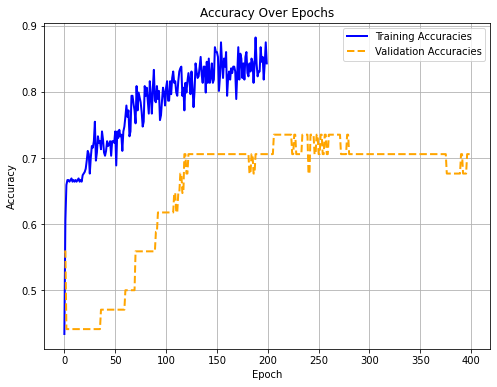

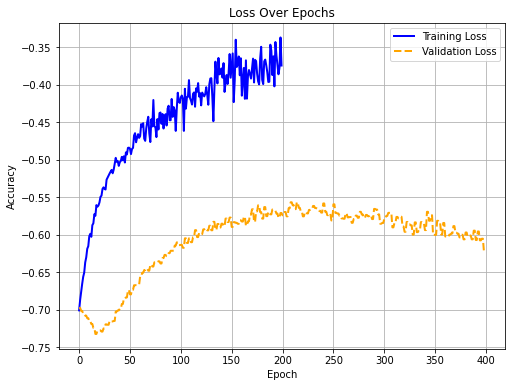

In [106]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# early_stopping = EarlyStopping(
#     patience=20,
#     min_delta_loss=0.0001,
#     min_delta_accuracy=0.0001,
#     restore_best_weights=True
# )
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_Adam(learning_rate=learning_rate)

# Training loop
for epoch in range(n_epochs):
    batch_losses = []
    batch_accuracies = []
    
    # Mini-batch training
    for X_batch, y_batch in create_batches(X_train, y_train, batch_size):
    # Forward pass through model
        model.forward(X_batch, training=True)
        
        # Calculate loss through separate loss activation
        loss = loss_activation.forward(model.output, y_batch)
        # print(y_batch.shape)
        # Calculate accuracy
        predictions = np.argmax(loss_activation.output, axis=1)
        accuracy = np.mean(predictions == y_batch)
        
        # Backward pass
        loss_activation.backward(loss_activation.output, y_batch)
        dvalues = loss_activation.dinputs
        
        # Propagate gradients through model layers in reverse
        for layer in reversed(model.layers):
            layer.backward(dvalues)
            dvalues = layer.dinputs
            
            # # Apply L1/L2 regularization to dense layers
            # if isinstance(layer, Layer_Dense):
            #     if layer.l1 > 0:
            #         layer.dweights += layer.l1 * np.sign(layer.weights)
            #     if layer.l2 > 0:
            #         layer.dweights += 2 * layer.l2 * layer.weights
        
        # Update parameters
        optimizer.pre_update_params()
        for layer in model.layers:
            if isinstance(layer, Layer_Dense):
                optimizer.update_params(layer)
        optimizer.post_update_params()
            
        batch_losses.append(loss)
        batch_accuracies.append(accuracy)
    
    epoch_loss = np.mean(batch_losses)
    epoch_accuracy = np.mean(batch_accuracies)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    # Validation pass
    model.forward(X_val, training=False)
    val_loss = loss_activation.forward(model.output, y_val)
    val_predictions = np.argmax(loss_activation.output, axis=1)
    val_accuracy = np.mean(val_predictions == y_val)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    # Calculate validation accuracy
    val_predictions = np.argmax(loss_activation.output, axis=1)
    if len(y_val.shape) == 2:
        y_val_true = np.argmax(y_val, axis=1)
    else:
        y_val_true = y_val
    val_accuracy = np.mean(val_predictions == y_val_true)
    
    # Append validation metrics
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    # early_stopping.on_epoch_end(
    #     current_loss=val_loss,
    #     current_accuracy=val_accuracy,
    #     model=[dense1, dense2], 
    #     epoch=epoch
    # )
    # if early_stopping.stop_training:
    #     print(f"Early stopping at epoch {epoch}")
    #     break
    
    # Print progress
    if not epoch % 100:
        print(f"epoch: {epoch}, "
              f"train_acc: {epoch_accuracy:.3f}, train_loss: {epoch_loss:.3f}, "
              f"val_acc: {val_accuracy:.3f}, val_loss: {val_loss:.3f}, "
              f"learning_rate: {optimizer.current_learning_rate}")

plot_accuracies(train_accuracies, val_accuracies, label1="Training Accuracies", label2="Validation Accuracies", title="Accuracy Over Epochs")
plot_accuracies(train_losses, val_losses, label1="Training Loss", label2="Validation Loss", title="Loss Over Epochs")

In [107]:
model.forward(X_test, training=False)
print(X_test.shape, y_test.shape)
# Calculate accuracy for the test set
predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
    y_true = np.argmax(y_test, axis=1) 
else:
    print("we go here")
    y_true = y_test

# Compute test accuracy
test_accuracy = np.mean(predictions == y_true)
print(f"Test Accuracy: {test_accuracy:.4f}")

(432, 6) (432,)
we go here


ValueError: ('Lengths must match to compare', (432,), (34,))

epoch: 0, train_acc: 0.485, train_loss: -0.700, val_acc: 0.520, val_loss: -0.676, learning_rate: 0.003
epoch: 100, train_acc: 0.876, train_loss: -0.232, val_acc: 0.920, val_loss: -0.214, learning_rate: 0.003
epoch: 200, train_acc: 0.990, train_loss: -0.060, val_acc: 1.000, val_loss: -0.056, learning_rate: 0.003
epoch: 300, train_acc: 0.990, train_loss: -0.031, val_acc: 1.000, val_loss: -0.066, learning_rate: 0.003


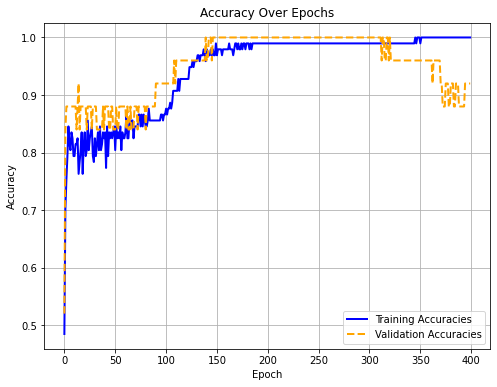

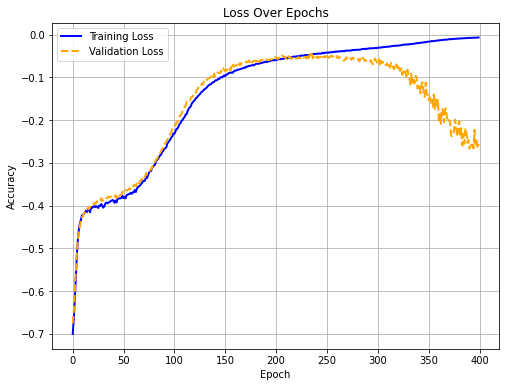

In [ ]:
n_epochs = 350
batch_size = 1


train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# early_stopping = EarlyStopping(
#     patience=20,
#     min_delta_loss=0.0001,
#     min_delta_accuracy=0.0001,
#     restore_best_weights=True
# )

# Training loop
for epoch in range(n_epochs):
    batch_losses = []
    batch_accuracies = []
    
    # Mini-batch training
    for X_batch, y_batch in create_batches(X_train, y_train, batch_size):
        # Forward pass
        dense1.forward(X_batch)
        activation4.forward(dense1.output)
        dense2.forward(activation4.output)
        loss = loss_activation.forward(dense2.output, y_batch)
        
        # Calculate accuracy for this batch
        predictions = np.argmax(loss_activation.output, axis=1)
        if len(y_batch.shape) == 2:
            y_true = np.argmax(y_batch, axis=1)
        else:
            y_true = y_batch
        accuracy = np.mean(predictions == y_true)
        
        # Backward pass
        loss_activation.backward(loss_activation.output, y_batch)
        dense2.backward(loss_activation.dinputs)
        activation4.backward(dense2.dinputs)
        dense1.backward(activation4.dinputs)
        
        # Update weights and biases
        optimizer.pre_update_params()
        optimizer.update_params(dense1)
        optimizer.update_params(dense2)
        optimizer.post_update_params()
        
        batch_losses.append(loss)
        batch_accuracies.append(accuracy)
    
    # Calculate epoch-level training metrics
    epoch_loss = np.mean(batch_losses)
    epoch_accuracy = np.mean(batch_accuracies)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    # Validation pass (entire validation dataset)
    dense1.forward(X_val)
    activation4.forward(dense1.output)
    dense2.forward(activation4.output)
    val_loss = loss_activation.forward(dense2.output, y_val)
    
    # Calculate validation accuracy
    val_predictions = np.argmax(loss_activation.output, axis=1)
    if len(y_val.shape) == 2:
        y_val_true = np.argmax(y_val, axis=1)
    else:
        y_val_true = y_val
    val_accuracy = np.mean(val_predictions == y_val_true)
    
    # Append validation metrics
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    # early_stopping.on_epoch_end(
    #     current_loss=val_loss,
    #     current_accuracy=val_accuracy,
    #     model=[dense1, dense2], 
    #     epoch=epoch
    # )
    # if early_stopping.stop_training:
    #     print(f"Early stopping at epoch {epoch}")
    #     break
    
    # Print progress
    if not epoch % 100:
        print(f"epoch: {epoch}, "
              f"train_acc: {epoch_accuracy:.3f}, train_loss: {epoch_loss:.3f}, "
              f"val_acc: {val_accuracy:.3f}, val_loss: {val_loss:.3f}, "
              f"learning_rate: {optimizer.current_learning_rate}")

plot_accuracies(train_accuracies, val_accuracies, label1="Training Accuracies", label2="Validation Accuracies", title="Accuracy Over Epochs")
plot_accuracies(train_losses, val_losses, label1="Training Loss", label2="Validation Loss", title="Loss Over Epochs")